# Access to electricy

This section investigates the questions in section C, related to access to electricity. In particular, 
we compare the available data with those reported in the country diagnostic.



In [1]:
# Preliminaries
SRC_PATH = '../../src/'
DATA_PATH = 'data/'


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18

from IPython.display import Image
import os,sys

sys.path.insert(0, os.path.normpath(os.path.join(os.path.abspath(''), SRC_PATH)))

from plot_utils import *
from plot_utils import ELECTRICITY_SOURCES

# load data
main = pd.read_excel(DATA_PATH + 'main.xlsx')

# important variables
n_households = len(main)
provinces = np.unique(main['Province'])



## Main source of electricity

We consider the question **C.182: Of all the sources that you mentioned above, which is the source that you use most of the time in your household?**


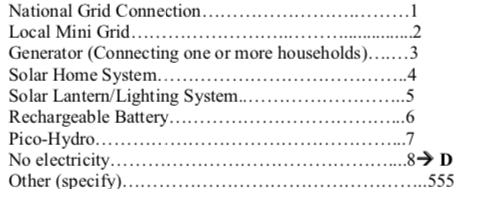

In [2]:
Image('images/main_elec_source.png')

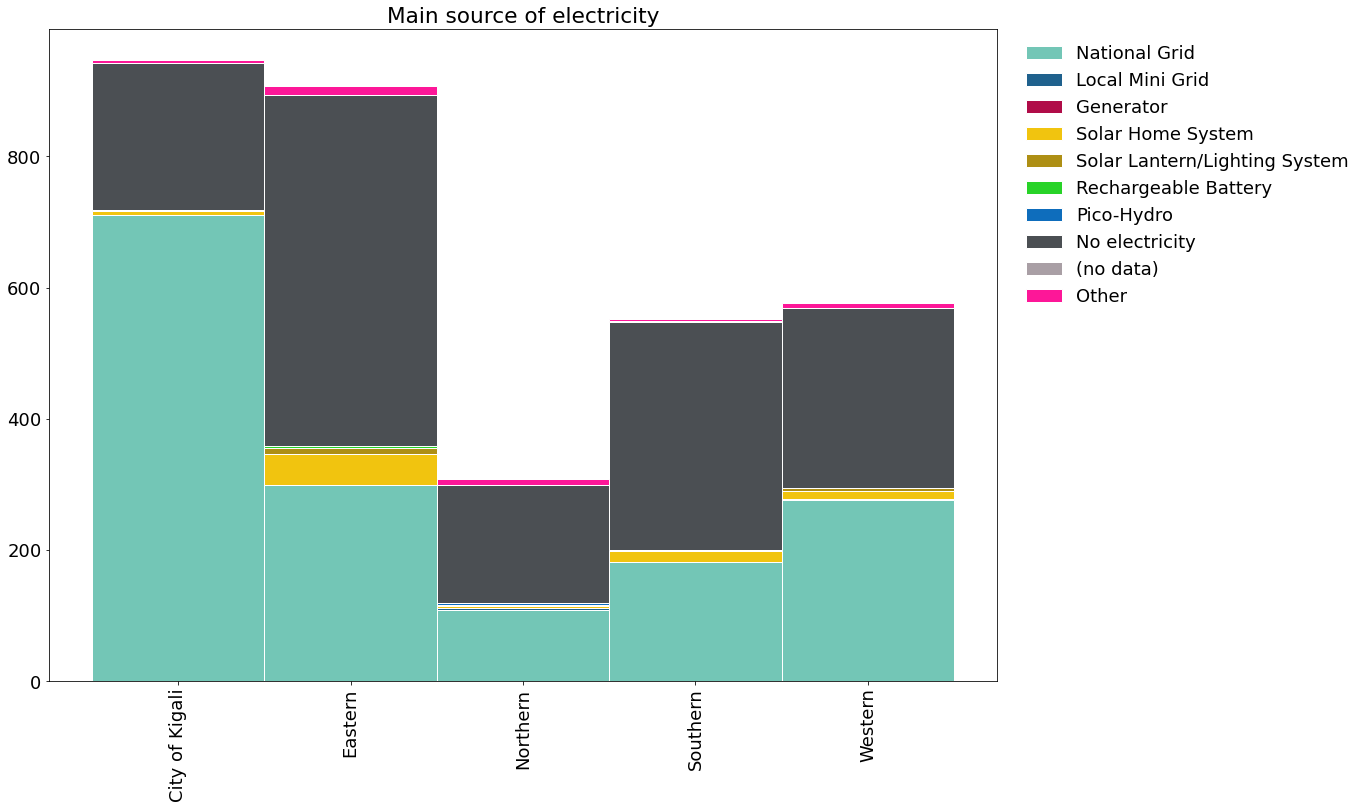

In [3]:
main_source_question = 'C182_which is the source that you use most of the time'
sources = [1,2,3,4,5,6,7,8,40,555]
sources_labels = ["National Grid","Local Mini Grid","Generator","Solar Home System",
                  "Solar Lantern/Lighting System", "Rechargeable Battery","Pico-Hydro",
                  "No electricity","(no data)","Other"]
data = get_bar_chart_data(main,provinces,"Province",sources,main_source_question)
data["title"]="Main source of electricity"
data['bars_labels'] = sources_labels

# Note: maybe we should remove all HH with "Other", "NA", and "40", 
# as these answer does not help in the following analysis

stacked_bar_chart(data,color_scheme=ELECTRICITY_SOURCES,barWidth=1,figure_name=None,
                  with_legend=True,title=True, horizontal=False,filename_legend=None,length=17,height=12) 

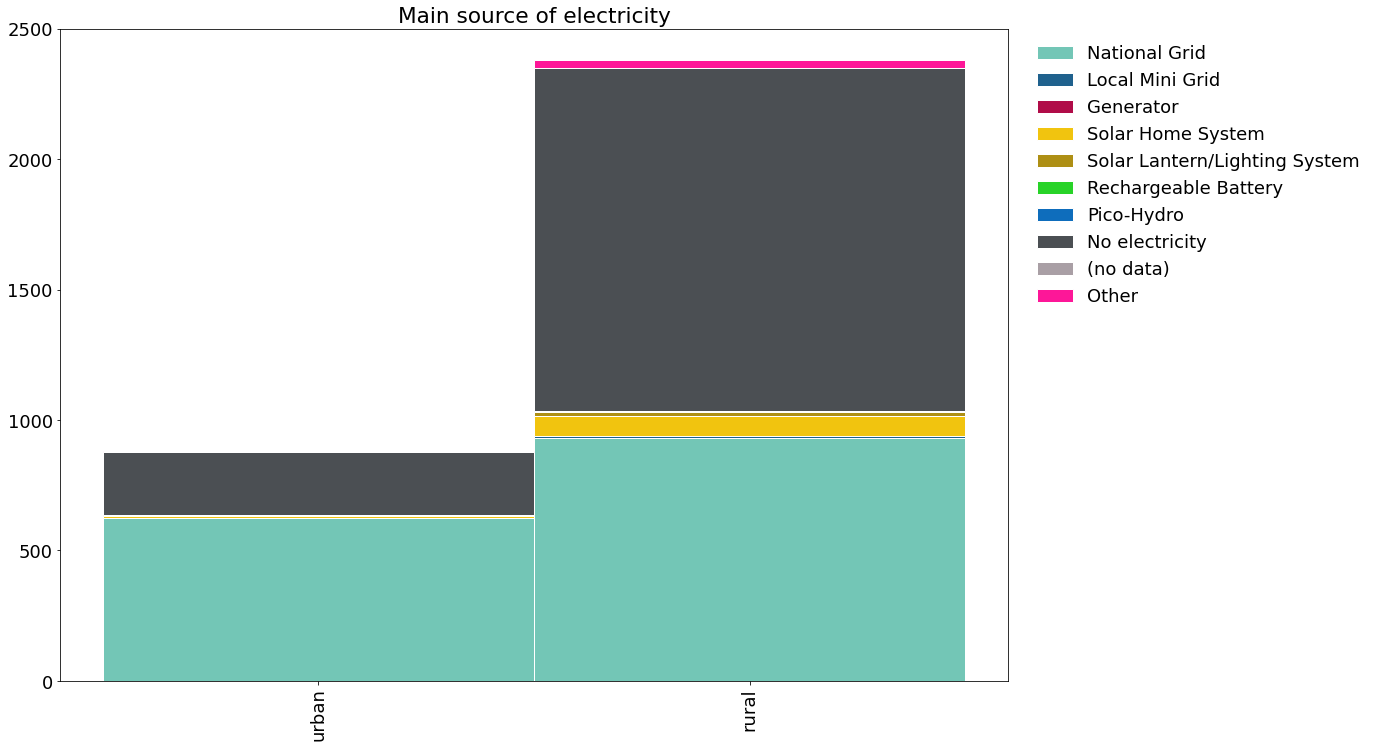

In [8]:
data = get_bar_chart_data(main,["urban","rural"],"habitat",sources,main_source_question)
data["title"]="Main source of electricity"
data['bars_labels'] = sources_labels

# Note: maybe we should remove all HH with "Other", "NA", and "40", 
# as these answer does not help in the following analysis

stacked_bar_chart(data,color_scheme=ELECTRICITY_SOURCES,barWidth=1,
                  figure_name=None,
                      with_legend=True,title=True,
                     horizontal=False,
                      filename_legend=None,
                     length=17,height=12) 

In [4]:
df = main[['Household Identification', main_source_question, 'habitat']]

national=analyze_by_question(df,main_source_question,[1,2,3,4,5,6,7,8],sources_labels)
urban=analyze_by_question(df.loc[df["habitat"]=="urban"],main_source_question,[1,2,3,4,5,6,7,8],sources_labels)
rural=analyze_by_question(df.loc[df["habitat"]=="rural"],main_source_question,[1,2,3,4,5,6,7,8],sources_labels)

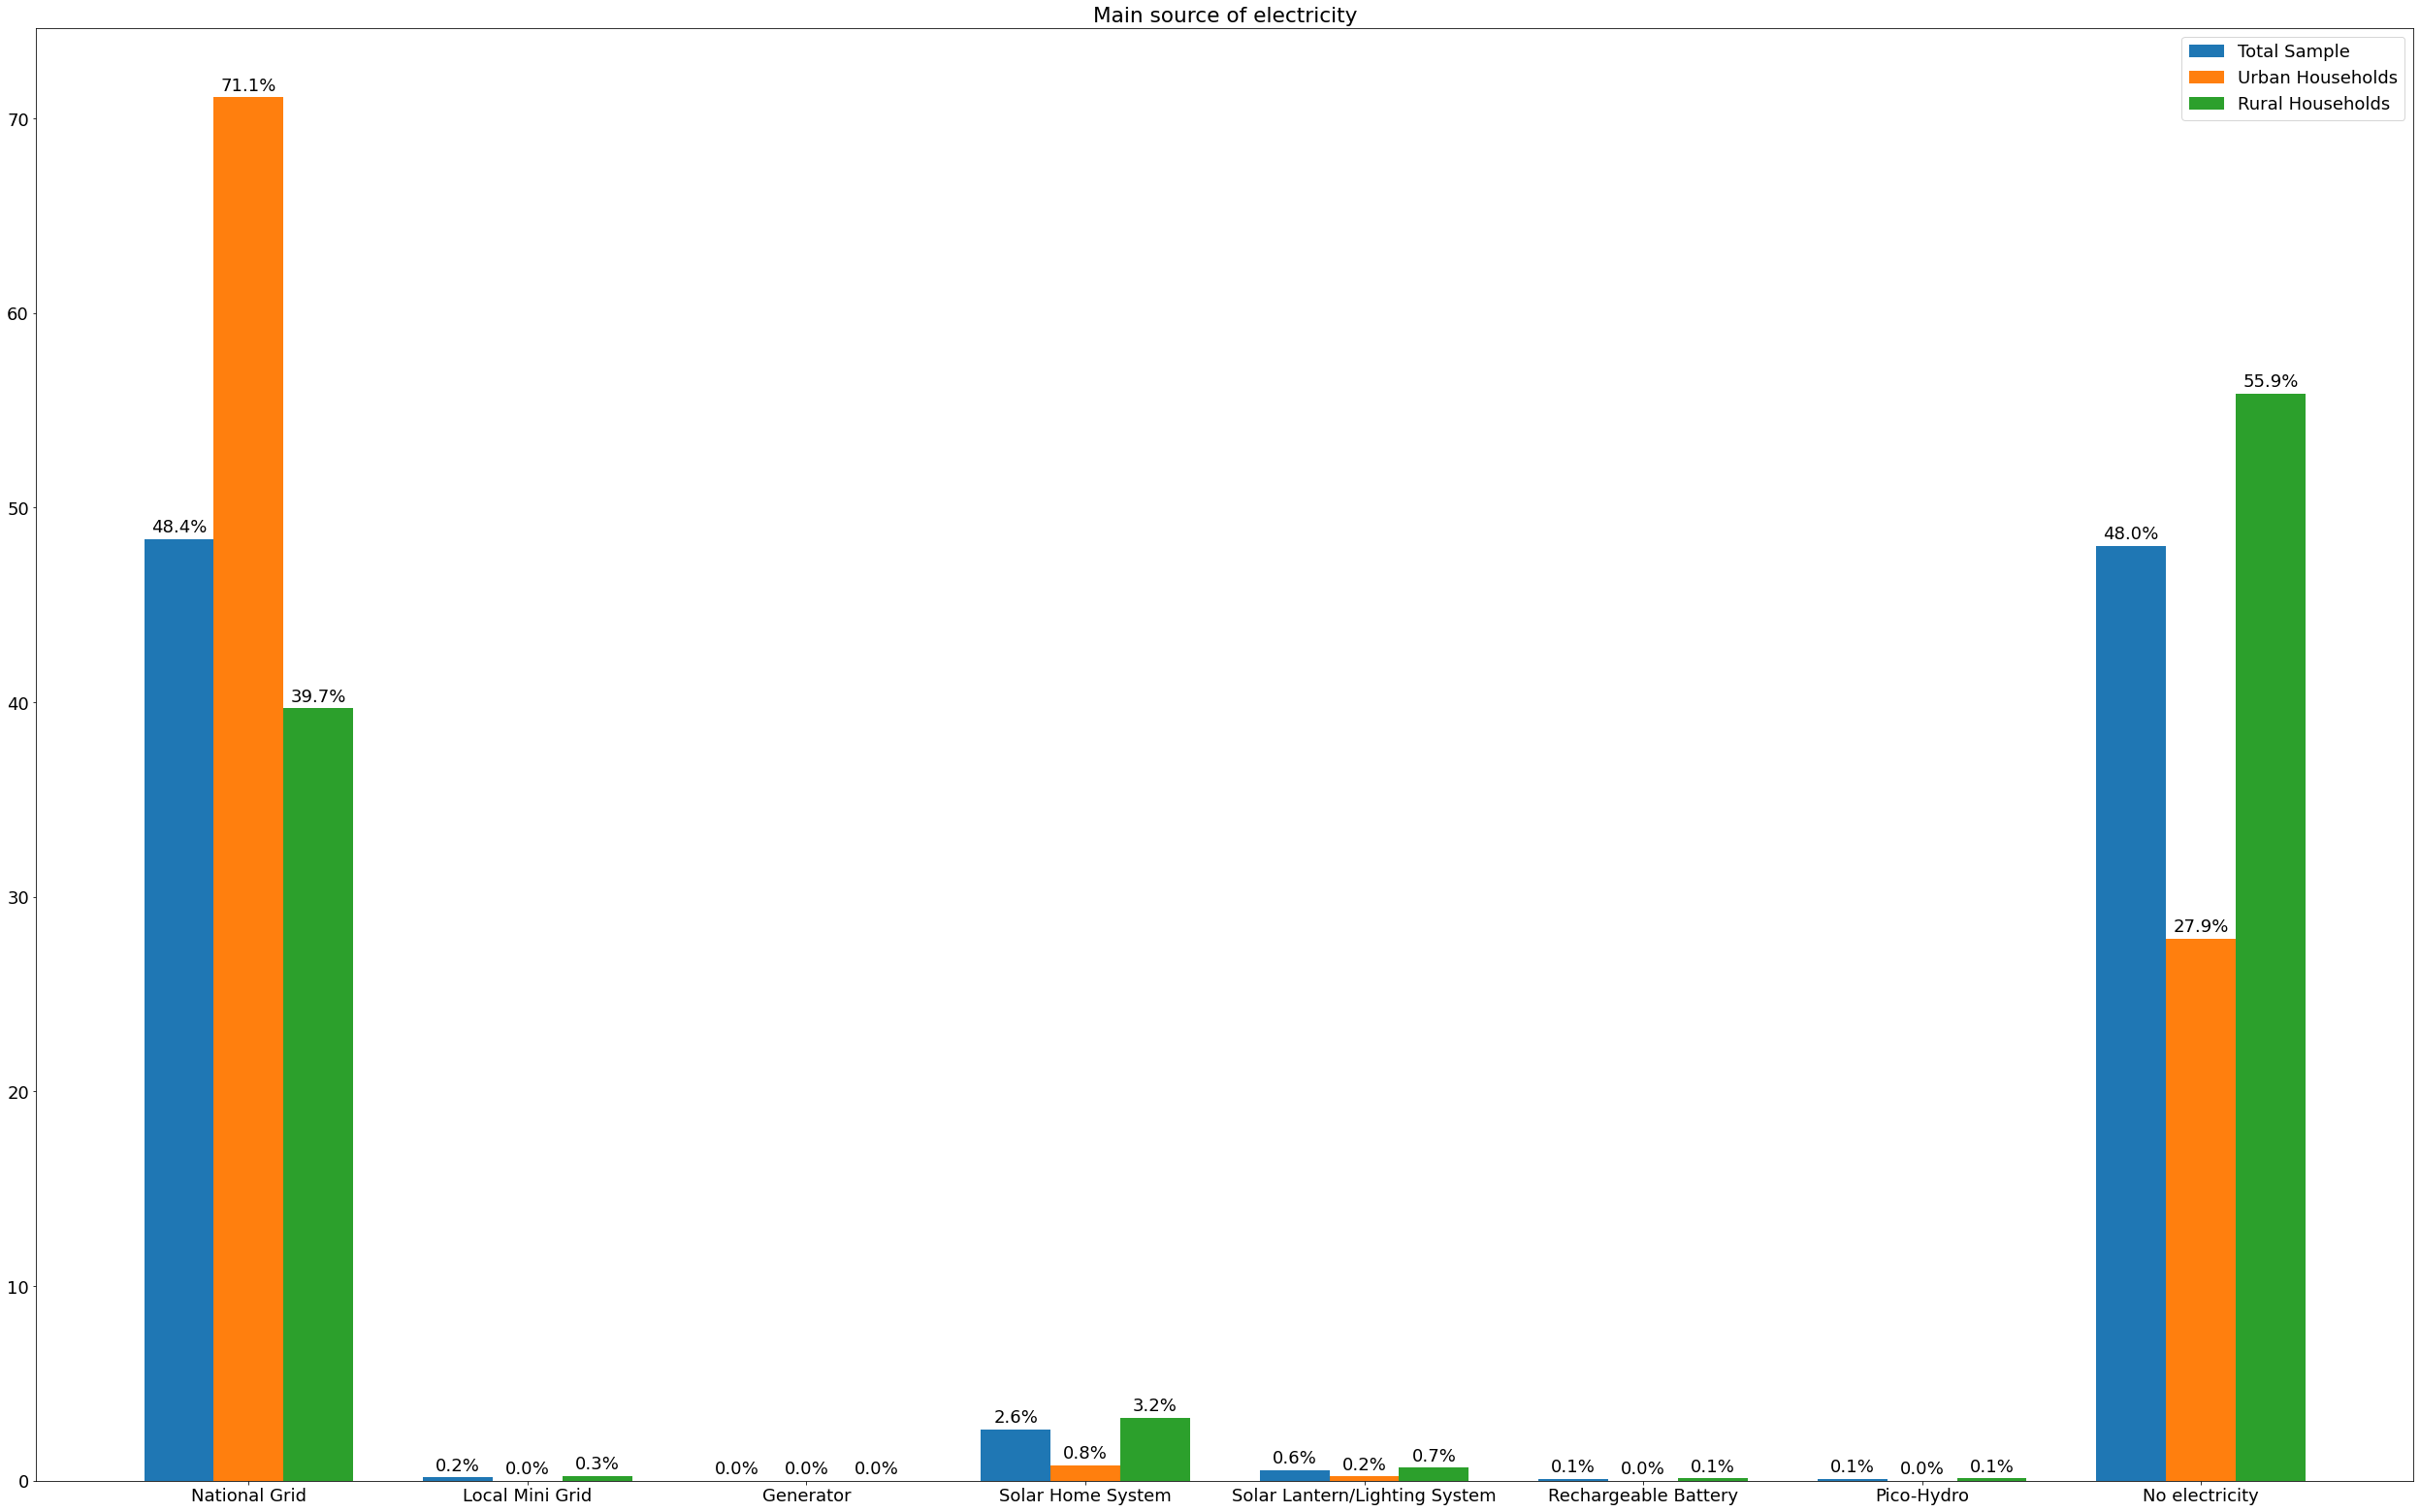

In [13]:
# grouped bar chart
national_values = [national[k]["percent"] for k in national.keys()]
urban_values = [urban[k]["percent"] for k in urban.keys()]
rural_values = [rural[k]["percent"] for k in rural.keys()]


x = np.arange(8)  # the label locations
width = 0.25  # the width of the bars


fig,ax = plt.subplots(figsize=(35,22))
rects1 = ax.bar(x - width, national_values, width, label='Total Sample')
rects2 = ax.bar(x, urban_values, width, label='Urban Households')
rects3 = ax.bar(x + width, rural_values, width, label='Rural Households')


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}%'.format(round(height,1)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)


ax.set_xticks(x)
ax.set_xticklabels(sources_labels[:8])
ax.legend()
plt.title('Main source of electricity')
fig.tight_layout()
plt.show()

### Connection to the national grid

We consider the question **C.2: Is the household connected to the national grid?**



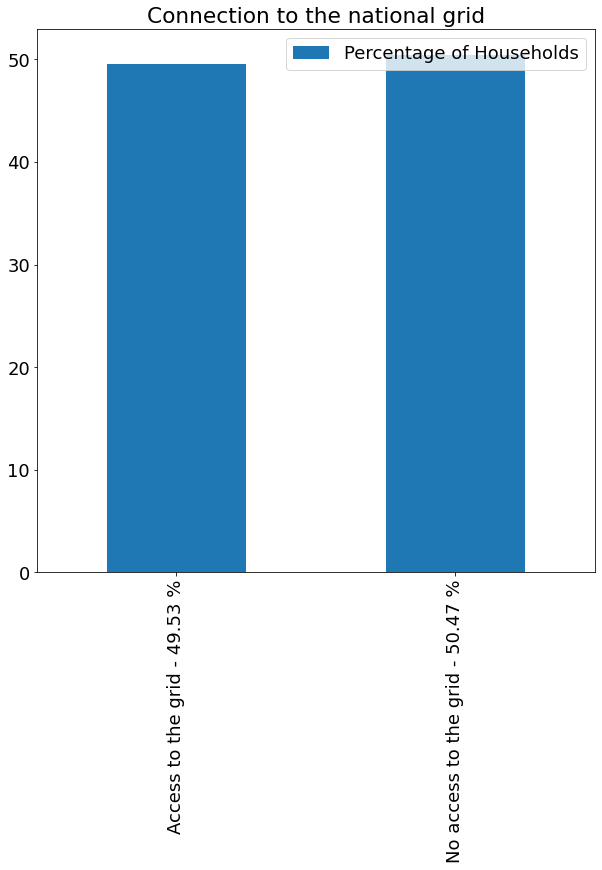

In [11]:
# Enter the question for the access to the national grid 
question_grid = 'C2_household connected to the national grid'
data_C2 = main[['Household Identification', question_grid, 'habitat']]

# plot
access_grid = len(data_C2[data_C2[question_grid] == 1])
no_access_grid = len(data_C2[data_C2[question_grid] == 2]) 
index = ["Access to the grid", "No access to the grid"]
percent = [100*access_grid/n_households,100*no_access_grid/n_households]
simple_bar_plot(index,'Percentage of Households',percent,"Connection to the national grid")

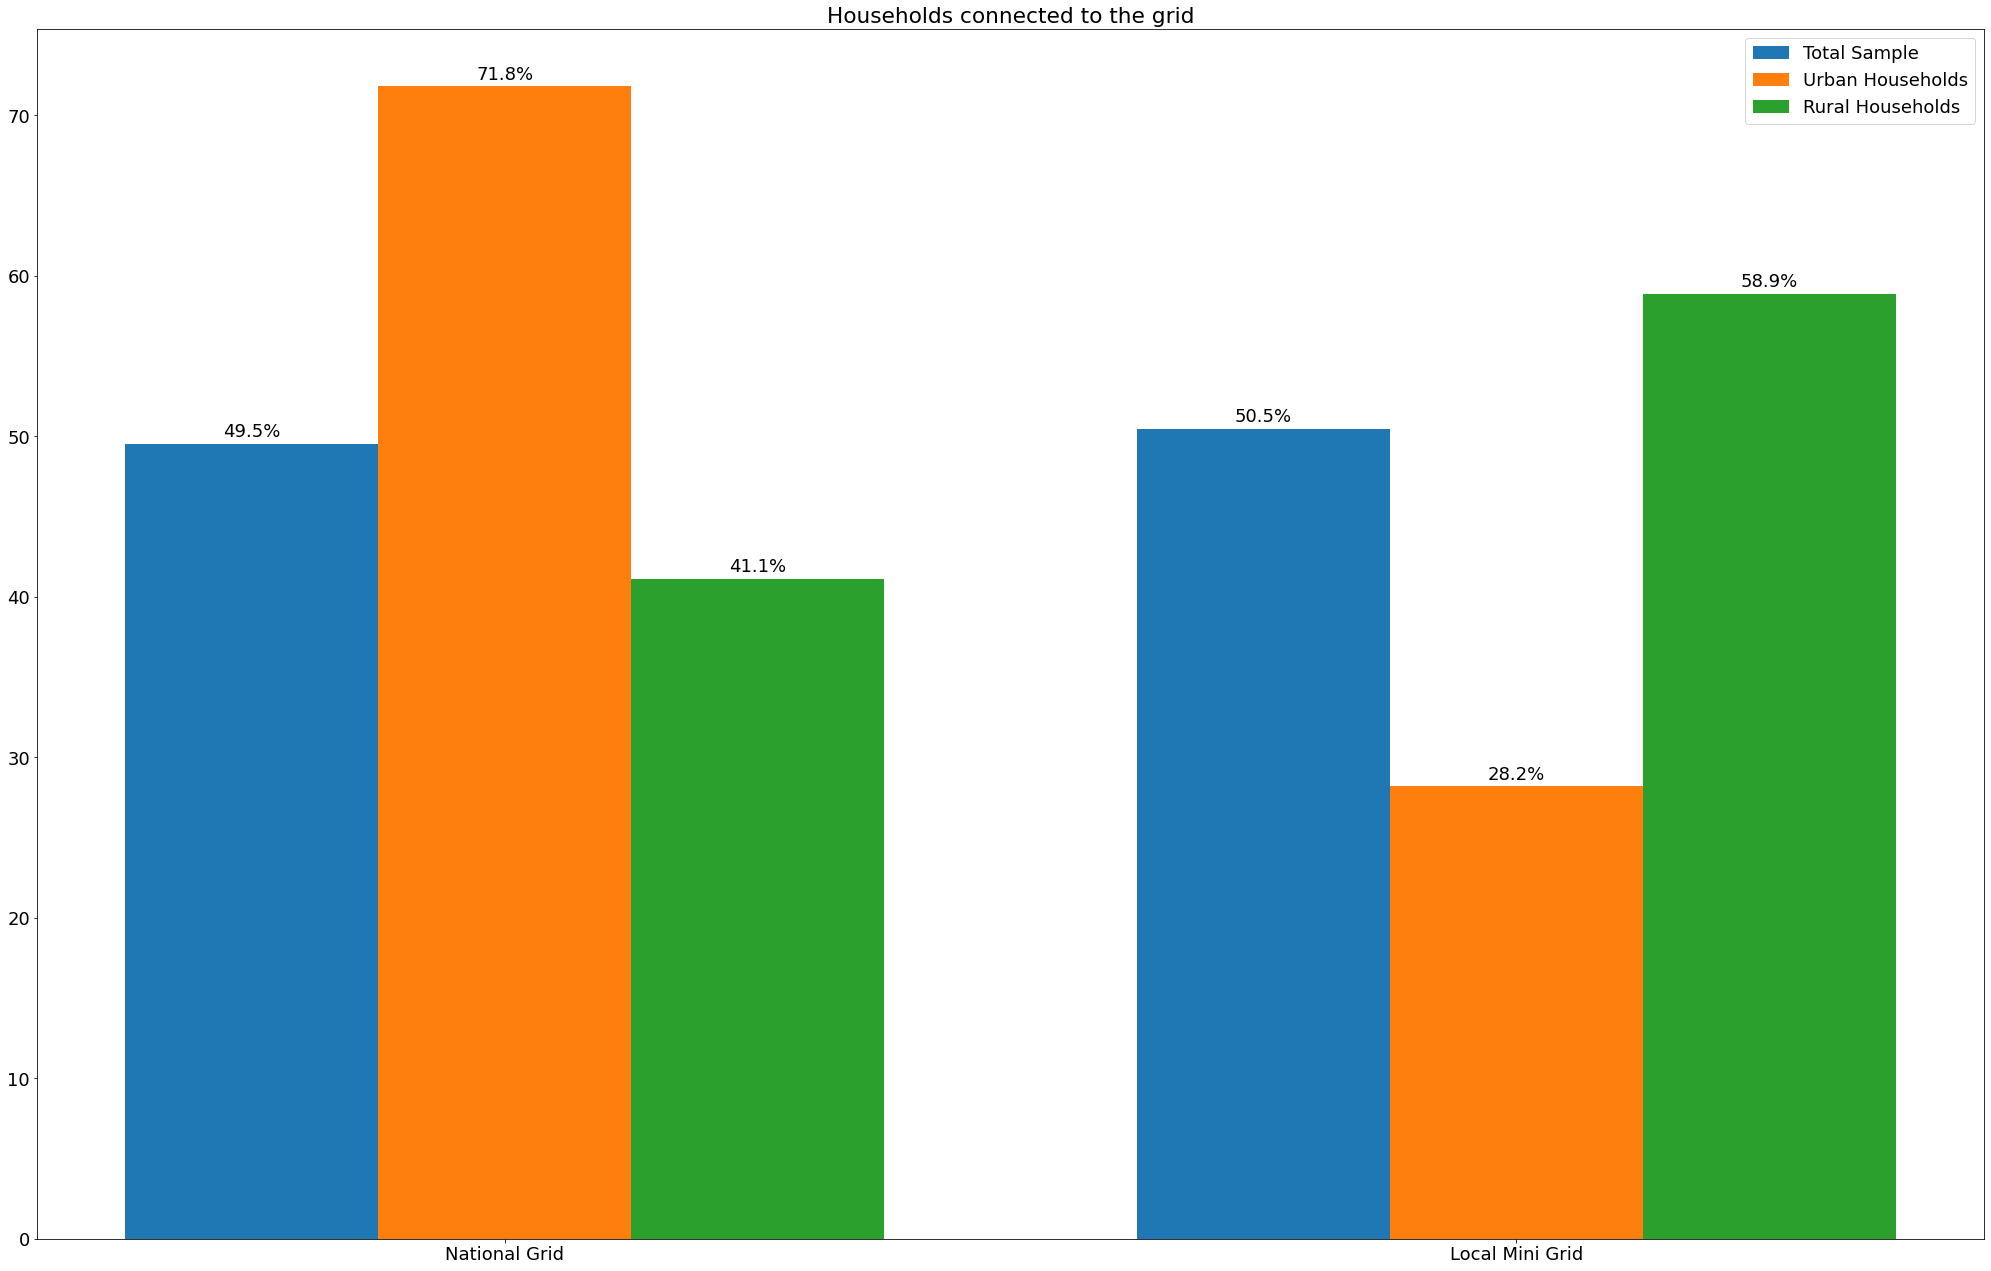

In [12]:
df = main[['Household Identification', question_grid, 'habitat']]

national=analyze_by_question(df,question_grid,[1,2],["Connected","Off-grid"])
urban=analyze_by_question(df.loc[df["habitat"]=="urban"],question_grid,[1,2],["Connected","Off-grid"])
rural=analyze_by_question(df.loc[df["habitat"]=="rural"],question_grid,[1,2],["Connected","Off-grid"])

# grouped bar chart
national_values = [national[k]["percent"] for k in national.keys()]
urban_values = [urban[k]["percent"] for k in urban.keys()]
rural_values = [rural[k]["percent"] for k in rural.keys()]

x = np.arange(2)  # the label locations
width = 0.25  # the width of the bars


fig,ax = plt.subplots(figsize=(28,18))
rects1 = ax.bar(x - width, national_values, width, label='Total Sample')
rects2 = ax.bar(x, urban_values, width, label='Urban Households')
rects3 = ax.bar(x + width, rural_values, width, label='Rural Households')


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}%'.format(round(height,1)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)


ax.set_xticks(x)
ax.set_xticklabels(sources_labels)
ax.legend()
plt.title('Households connected to the grid')
fig.tight_layout()
plt.show()

**According to the MTF report**: 
- 77.4% of urban households are connected to the grid, compared with 15.6% of rural
households.

- Nationwide, 28.6% of households have access to at least one source of electricity: 23.5% of households have access through the grid, and 5.1% have access through off-grid solutions.

**Here**

- 71.8% of urban households are connected to the grid, compared with 39.1% of rural
households.

- Nationwide, 50.4% of households have access to at least one source of electricity: 47.8% of households have access through the grid, and 2.6% have access through off-grid solutions. 

### Reason for not having a connection to national grid

We also look at the question **C3: Main reason why your household is not connected to the grid**

In [44]:
q = "C3_MAIN reason why your household is not connected to the grid"
not_connected = main.loc[main[question_grid]==2]
reason = not_connected[q]

N = len(not_connected)
not_connected[q].head()
count = []
for k in range(0,9):
    count.append(0.)
    
for index,row in not_connected.iterrows():
    for k in range(1,10):
        if not np.isnan(row[q]) and int(row[q])==k:
            count[k-1] += 1

not_na = sum(count)
for k in range(0,9):
    count[k] = round(count[k]/not_na,3)*100
    
## TODO: bar plot

### Comments

**According to the MTF report:** 23.5% of households have access through the grid, and 5.1% have access through off-grid solutions, mostly solar. 

We have very different results here: almost the hald have access to the national grid. 


### Most serious problems and satisfaction with the national grid connection

We consider the questions: **C.40: What are the most serious problems you experience with your grid electricity?**


The answer are reported only for those who answered that the national grid is the main source of electricity
(**R.8, if C.182 == 1: How satisfied are you with the service from the national grid?**)

The different possible answers are presented in the figure below.


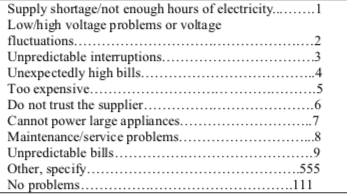

In [45]:
Image('../images/serious_pbs.png')

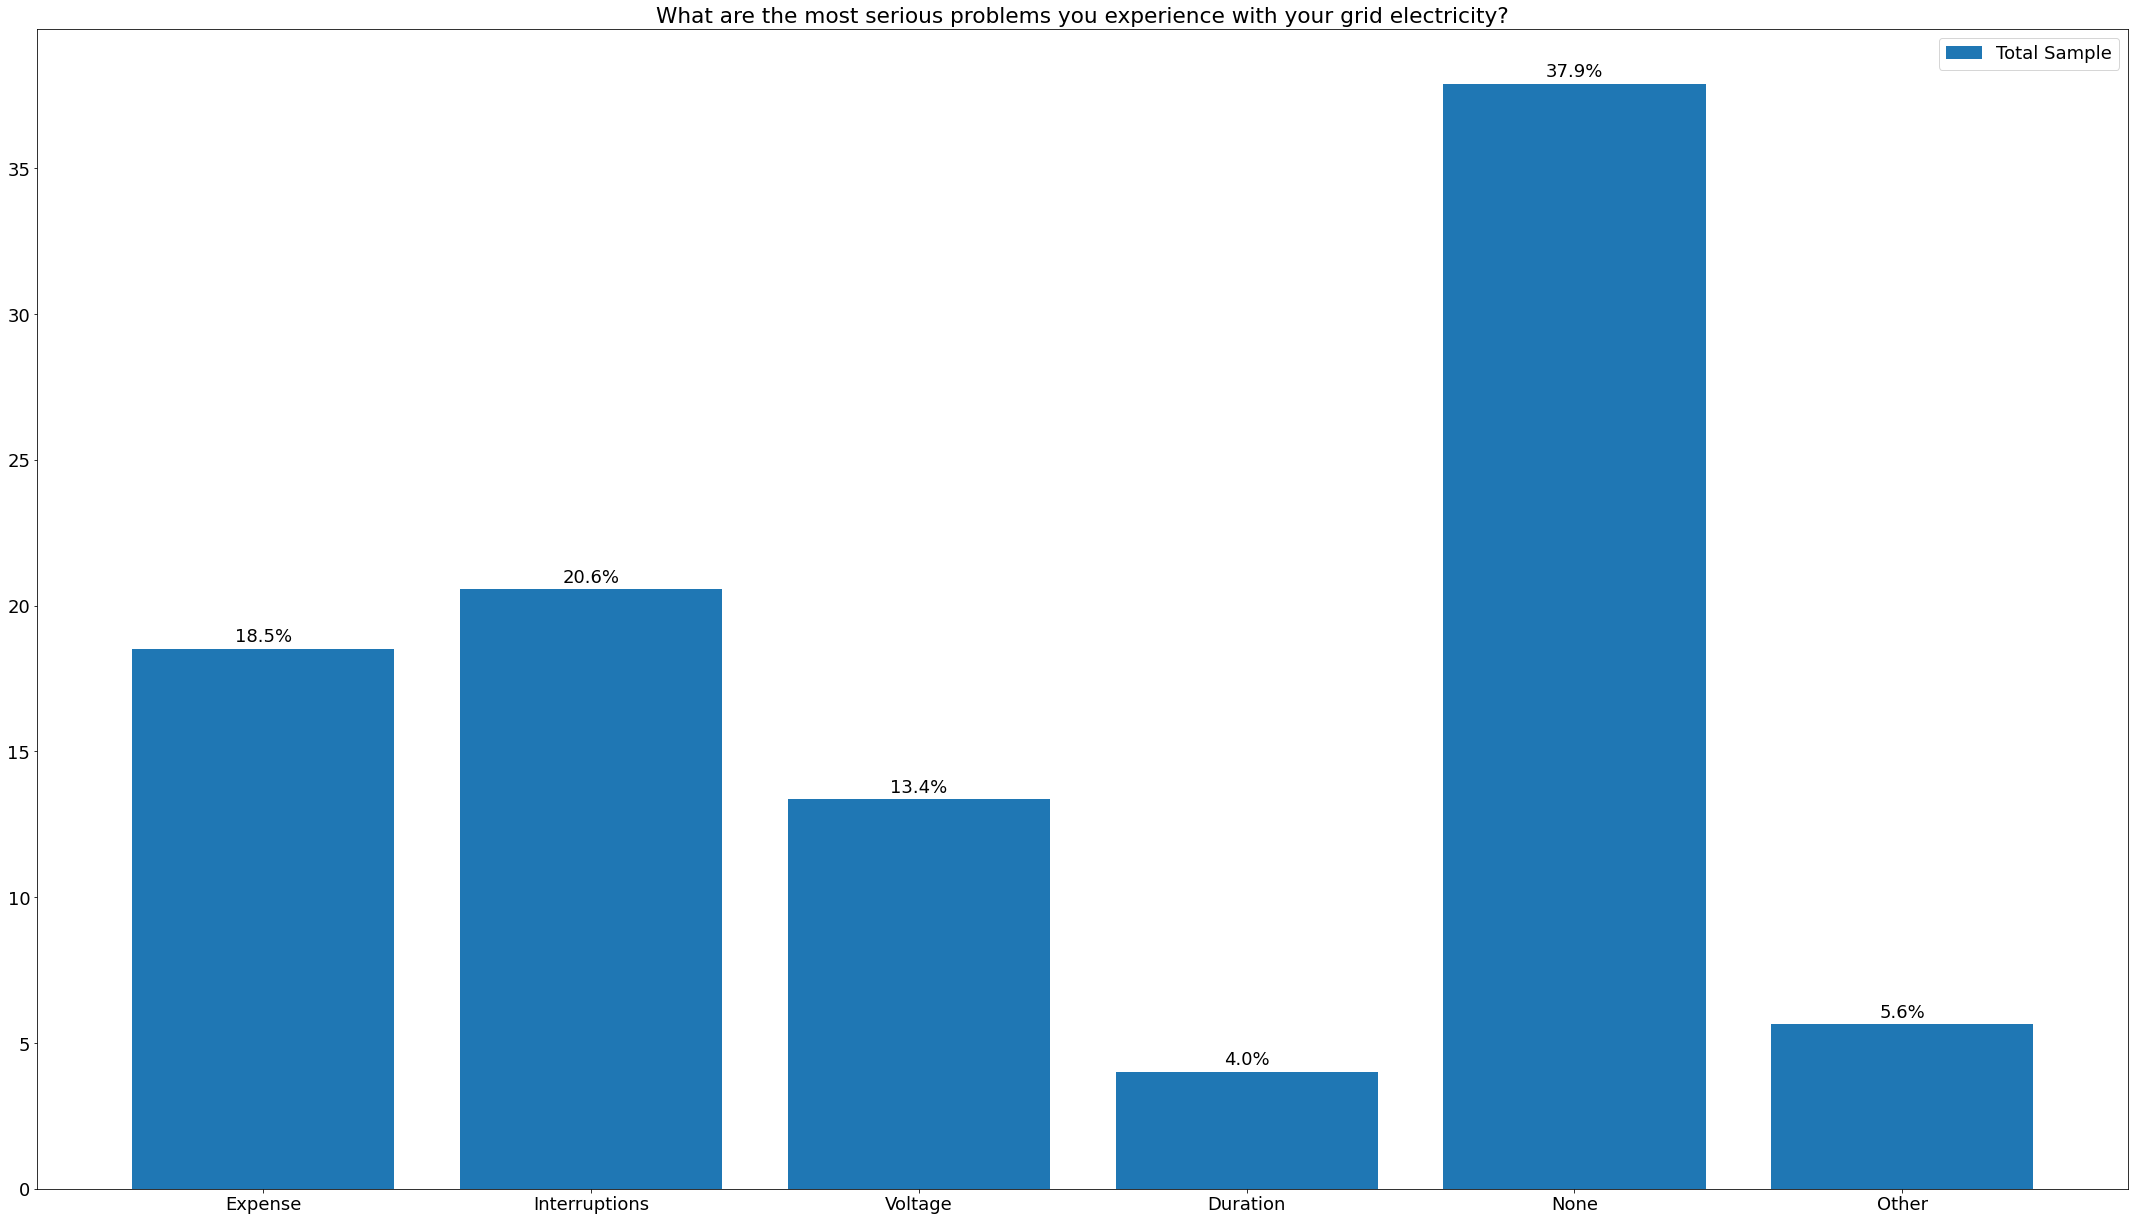

In [13]:
df = main.loc[main[main_source_question] == 1]

n_expense = sum(
    [len(df[q].dropna()) for q in ['C40_4_Unexpectedly high bills','C40_5_Too expensive','C40_9_Unpredictable bills']])
n_interruption = len(df['C40_3_Unpredictable interruptions'].dropna())
n_voltage = len(df['C40_2_Low/high voltage problems or voltage fluctuations'].dropna())
n_duration  = len(df['C40_1_Supply shortage/not enough hours of electricity'].dropna())
n_none = len(df['C40_11_No problems'].dropna())
n_other = sum(
    [len(df[q].dropna()) for q in [
        'C40_10_Other','C40_8_Maintenance/service problems','C40_6_Do not trust the supplier','C40_7_Cannot power large appliances']])


n_tot = n_expense + n_interruption + n_voltage + n_duration + n_none + n_other
percent = [100*n_expense/n_tot, 100*n_interruption/n_tot, 100*n_voltage/n_tot,100*n_duration/n_tot,100*n_none/n_tot,100*n_other/n_tot]

labels = ['Expense','Interruptions', 'Voltage', 'Duration', 'None', 'Other']

x = np.arange(len(labels))  # the label locations
width = 0.8  # the width of the bars

fig,ax = plt.subplots(figsize=(30,17))
rects1 = ax.bar(x, percent, width, label='Total Sample')

autolabel(rects1)
fig.tight_layout()

# Add some text for labels, title and custom x-axis tick labels, etc.

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.title('What are the most serious problems you experience with your grid electricity?')
plt.show()

The results we found are in line with ESMAP report:

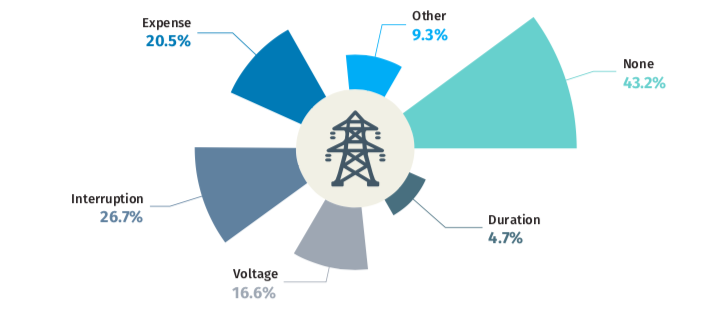

In [14]:
Image('images/most_serious_problems.png')

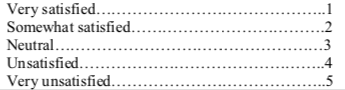

In [15]:
Image('images/satisfaction.png')

In [16]:
n_verysat = len(df[df['R8_How satisfied are you with the service from the source on C182'] == 1])
n_somesat = len(df[df['R8_How satisfied are you with the service from the source on C182'] == 2])
n_neutral = len(df[df['R8_How satisfied are you with the service from the source on C182'] == 3])
n_unsat = len(df[df['R8_How satisfied are you with the service from the source on C182'] == 4])
n_veryunsat = len(df[df['R8_How satisfied are you with the service from the source on C182'] == 5])

n_tot = n_verysat + n_somesat + n_neutral + n_unsat + n_veryunsat

percent = [100*n_verysat/n_tot, 100*n_somesat/n_tot,100*n_neutral/n_tot,100*n_unsat/n_tot,100*n_veryunsat/n_tot]
    

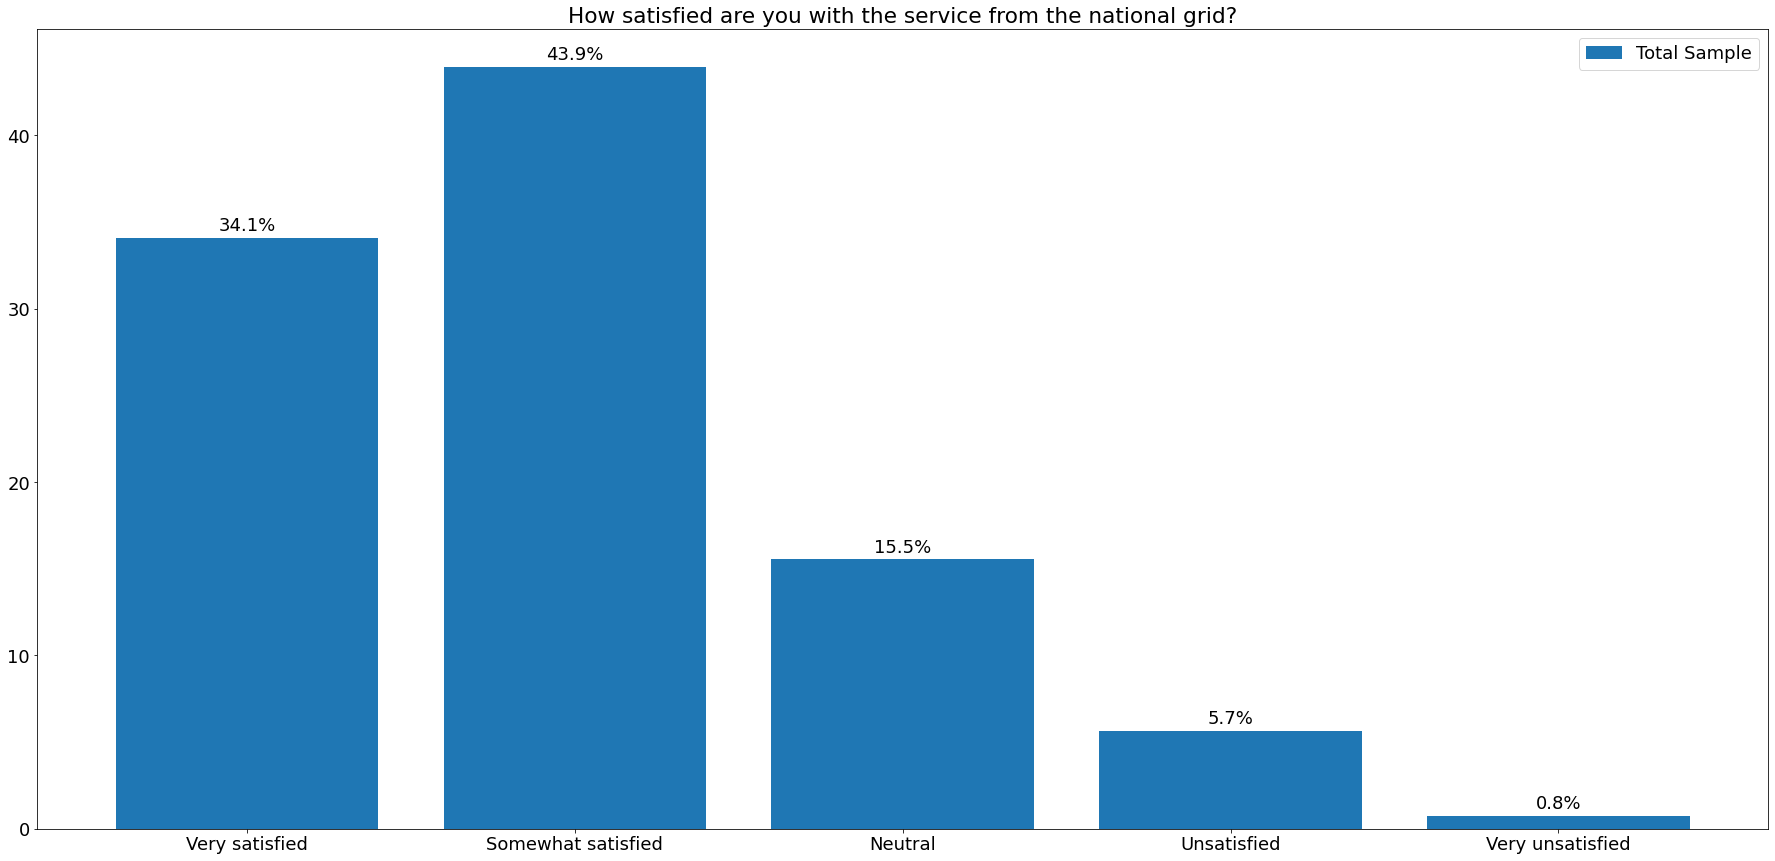

In [17]:
labels = ['Very satisfied','Somewhat satisfied', 'Neutral', 'Unsatisfied', 'Very unsatisfied']

x = np.arange(len(labels))  # the label locations
width = 0.8  # the width of the bars

fig,ax = plt.subplots(figsize=(25,12))
rects1 = ax.bar(x, percent, width, label='Total Sample')

autolabel(rects1)
fig.tight_layout()

# Add some text for labels, title and custom x-axis tick labels, etc.

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.title('How satisfied are you with the service from the national grid?')
plt.show()

Corresponding figure of the ESMAP report

**According to the MTF report**  

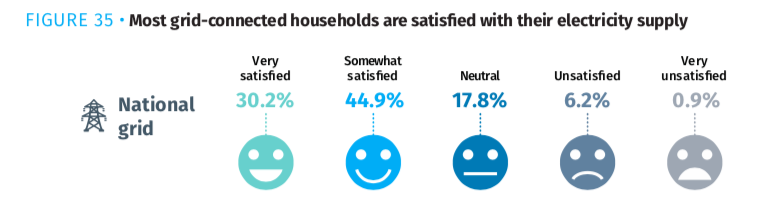

In [15]:
Image('images/how_satisfied.png')

Among grid-connected households, 75.1% are satisfied with their electricity supply, and only 7.1% of grid-connected households are unsatisfied. This result and this above plot are in line with the figures we found.